In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive

# Ensure Kaggle API key is in place
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/.kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
# Define paths
dataset_path = '/content/drive/MyDrive/MRIdataset/brain-tumors-dataset.zip'
extract_path = '/content/drive/MyDrive/MRIdataset/brain_tumors_dataset'

# Download the dataset directly to Google Drive
!kaggle datasets download -d mohammadhossein77/brain-tumors-dataset -p '/content/drive/MyDrive/MRIdataset' --force

# Unzip the dataset
import zipfile
import os

os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Remove the zip file after extraction
os.remove(dataset_path)

# Verify the contents of the dataset
!ls -l '{extract_path}'

Dataset URL: https://www.kaggle.com/datasets/mohammadhossein77/brain-tumors-dataset
License(s): CC0-1.0
 94% 209M/221M [00:02<00:00, 98.5MB/s]
100% 221M/221M [00:02<00:00, 89.5MB/s]
total 4
drwx------ 4 root root 4096 Jul 11 13:06 Data


### Split the dataset to training, validation, and testing dataset

In [ ]:
import os
import shutil

# Define the current and new directory paths
current_dir = '/content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data'
new_dir = '/content/drive/My Drive/MRIdataset/dataset'

# Create new directories if they don't exist
os.makedirs(os.path.join(new_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(new_dir, 'glioma'), exist_ok=True)
os.makedirs(os.path.join(new_dir, 'meningioma'), exist_ok=True)
os.makedirs(os.path.join(new_dir, 'pituitary'), exist_ok=True)

# Function to move files and debug print
def move_files(src_dir, dst_dir):
    print(f"Moving files from {src_dir} to {dst_dir}")
    for filename in os.listdir(src_dir):
        src = os.path.join(src_dir, filename)
        dst = os.path.join(dst_dir, filename)
        print(f"Moving {src} to {dst}")
        shutil.move(src, dst)

# Move normal images
normal_dir = os.path.join(current_dir, 'Normal')
move_files(normal_dir, os.path.join(new_dir, 'normal'))

# Move glioma images
glioma_dir = os.path.join(current_dir, 'Tumor', 'glioma_tumor')
move_files(glioma_dir, os.path.join(new_dir, 'glioma'))

# Move meningioma images
meningioma_dir = os.path.join(current_dir, 'Tumor', 'meningioma_tumor')
move_files(meningioma_dir, os.path.join(new_dir, 'meningioma'))

# Move pituitary images
pituitary_dir = os.path.join(current_dir, 'Tumor', 'pituitary_tumor')
move_files(pituitary_dir, os.path.join(new_dir, 'pituitary'))


Streaming output truncated to the last 5000 lines.
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tumor/P_217_HF_.jpg to /content/drive/My Drive/MRIdataset/dataset/pituitary/P_217_HF_.jpg
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tumor/P_217_RO_.jpg to /content/drive/My Drive/MRIdataset/dataset/pituitary/P_217_RO_.jpg
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tumor/P_217_SP_.jpg to /content/drive/My Drive/MRIdataset/dataset/pituitary/P_217_SP_.jpg
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tumor/P_217_VF_.jpg to /content/drive/My Drive/MRIdataset/dataset/pituitary/P_217_VF_.jpg
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tumor/P_218.jpg to /content/drive/My Drive/MRIdataset/dataset/pituitary/P_218.jpg
Moving /content/drive/My Drive/MRIdataset/brain_tumors_dataset/Data/Tumor/pituitary_tum

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Define function to split data and count images
def split_data(source, train_dest, val_dest, test_dest, test_size=0.1, val_size=0.2):
    # Get all class directories
    classes = [d for d in os.listdir(source) if os.path.isdir(os.path.join(source, d))]

    counts = {}  # Dictionary to store image counts

    for class_name in classes:
        class_dir = os.path.join(source, class_name)
        # Get all files in the class directory, filtering by common image extensions
        images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not images: # Check if any images were found
            print(f"Warning: No images found in directory: {class_dir}")
            continue # Skip to the next class if no images are found

        # Split the dataset into train+val and test sets
        train_and_val, test = train_test_split(images, test_size=test_size, random_state=42)
        # Split the train+val dataset into train and val sets
        train, val = train_test_split(train_and_val, test_size=val_size, random_state=42)

        counts[class_name] = {
            'train': len(train),
            'val': len(val),
            'test': len(test)
        }

        # Copy files to the respective directories
        for img in train:
            create_dir(os.path.join(train_dest, class_name))
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dest, class_name, img))

        for img in val:
            create_dir(os.path.join(val_dest, class_name))
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_dest, class_name, img))

        for img in test:
            create_dir(os.path.join(test_dest, class_name))
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dest, class_name, img))

    return counts

# Paths
source_dir = '/content/drive/My Drive/MRIdataset/dataset'
train_dir = '/content/drive/My Drive/MRIdataset/output/training'
val_dir = '/content/drive/My Drive/MRIdataset/output/validation'
test_dir = '/content/drive/My Drive/MRIdataset/output/testing'

# Split the data and get image counts
image_counts = split_data(source_dir, train_dir, val_dir, test_dir)

# Print image counts
for class_name, count_dict in image_counts.items():
    print(f"Class: {class_name}")
    print(f"  Training: {count_dict['train']} images")
    print(f"  Validation: {count_dict['val']} images")
    print(f"  Testing: {count_dict['test']} images")
    print()


Class: normal
  Training: 2207 images
  Validation: 552 images
  Testing: 307 images

Class: glioma
  Training: 4540 images
  Validation: 1136 images
  Testing: 631 images

Class: meningioma
  Training: 4600 images
  Validation: 1151 images
  Testing: 640 images

Class: pituitary
  Training: 4253 images
  Validation: 1064 images
  Testing: 591 images



# Data Modelling

### ResNet50, Dense121, MobileNetv3

In [ ]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
tf.debugging.set_log_device_placement(True)

try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:2'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
except RuntimeError as e:
  print(e)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [ ]:
import tensorflow as tf
import time

# Large matrix multiplication to see GPU usage
with tf.device('/GPU:0'):
    a = tf.random.normal([5000, 5000])
    b = tf.random.normal([5000, 5000])

    start_time = time.time()
    c = tf.matmul(a, b)
    end_time = time.time()

print("Matrix multiplication result:\n", c)
print("Time taken for matrix multiplication on GPU: ", end_time - start_time, "seconds")


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Matrix multiplication result:
 tf.Tensor(
[[ 82.33676   -73.31204   -95.27427   ... -97.57767   -34.197796
   26.647161 ]
 [ 62.88529  

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large, DenseNet121, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import os
import time

# Create AUC metric instance outside of any tf.function
auc_metric = AUC(curve='PR', name='mAP')

def compute_map(y_true, y_pred):
    # Use the pre-created AUC instance
    return auc_metric(y_true, y_pred)

def build_model(base_model, num_classes):
    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Model to train
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base_model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

def train_model(model, train_generator, val_generator, test_generator, epochs):
    # Compile the model with mAP metric
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', compute_map])

    # Record the training start time
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator
    )

    # Calculate training time
    training_time = time.time() - start_time

    # Unfreeze some layers in base_model and fine-tune
    for layer in model.layers[-20:]:  # Fine-tune last 20 layers
        layer.trainable = True

    # Recompile the model
    model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy', compute_map])

    # Fine-tune the model
    history_fine = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator
    )

    # Evaluate the model
    loss, accuracy, mAP = model.evaluate(test_generator)
    print(f'Test accuracy: {accuracy:.2f}, mAP: {mAP:.2f}')
    print(f'Training time: {training_time:.2f} seconds')

    return history, history_fine

In [ ]:
# Directory setup
source_dir = '/content/drive/My Drive/MRIdataset/output/'
train_dir = os.path.join(source_dir, 'training')
val_dir = os.path.join(source_dir, 'validation')
test_dir = os.path.join(source_dir, 'testing')

# Image data generators
def create_data_generators(train_dir, val_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    return train_generator, val_generator, test_generator


##### MobileNetv3

In [ ]:
# Train MobileNetV3
train_generator, val_generator, test_generator = create_data_generators(train_dir, val_dir, test_dir)
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = build_model(base_model, len(train_generator.class_indices))
print("\nTraining MobileNetV3Large:")
history_mobilenet, history_fine_mobilenet = train_model(model, train_generator, val_generator, test_generator, epochs=50)

Found 15604 images belonging to 4 classes.
Found 3906 images belonging to 4 classes.
Found 2169 images belonging to 4 classes.

Training MobileNetV3Large:
Epoch 1/50
976/976 [==============================] - 281s 285ms/step - loss: 1.2728 - accuracy: 0.3935 - compute_map: 0.3594 - val_loss: 1.1578 - val_accuracy: 0.5028 - val_compute_map: 0.3976
Epoch 2/50
976/976 [==============================] - 238s 244ms/step - loss: 1.1986 - accuracy: 0.4482 - compute_map: 0.4165 - val_loss: 1.1447 - val_accuracy: 0.4291 - val_compute_map: 0.4313
Epoch 3/50
976/976 [==============================] - 242s 248ms/step - loss: 1.1638 - accuracy: 0.4712 - compute_map: 0.4419 - val_loss: 1.0792 - val_accuracy: 0.5417 - val_compute_map: 0.4521
Epoch 4/50
976/976 [==============================] - 245s 251ms/step - loss: 1.1557 - accuracy: 0.4783 - compute_map: 0.4596 - val_loss: 1.1384 - val_accuracy: 0.4475 - val_compute_map: 0.4636
Epoch 5/50
976/976 [==============================] - 240s 246ms/step

##### DenseNet121

In [ ]:
# Train DenseNet121
train_generator, val_generator, test_generator = create_data_generators(train_dir, val_dir, test_dir)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = build_model(base_model, len(train_generator.class_indices))
print("\nTraining DenseNet121:")
history_densenet, history_fine_densenet = train_model(model, train_generator, val_generator, test_generator, epochs=50)

Found 15604 images belonging to 4 classes.
Found 3906 images belonging to 4 classes.
Found 2169 images belonging to 4 classes.
29084464/29084464 [==============================] - 1s 0us/step

Training DenseNet121:
Epoch 1/50
976/976 [==============================] - 6301s 6s/step - loss: 0.6273 - accuracy: 0.7598 - compute_map: 0.7838 - val_loss: 0.5096 - val_accuracy: 0.8098 - val_compute_map: 0.8480
Epoch 2/50
976/976 [==============================] - 740s 759ms/step - loss: 0.4814 - accuracy: 0.8139 - compute_map: 0.8641 - val_loss: 0.5406 - val_accuracy: 0.7826 - val_compute_map: 0.8750
Epoch 3/50
976/976 [==============================] - 748s 767ms/step - loss: 0.4292 - accuracy: 0.8363 - compute_map: 0.8820 - val_loss: 0.4513 - val_accuracy: 0.8292 - val_compute_map: 0.8892
Epoch 4/50
976/976 [==============================] - 758s 776ms/step - loss: 0.3878 - accuracy: 0.8511 - compute_map: 0.8952 - val_loss: 0.3693 - val_accuracy: 0.8607 - val_compute_map: 0.9008
Epoch 5/50


##### ResNet50

In [ ]:
# Train ResNet50
train_generator, val_generator, test_generator = create_data_generators(train_dir, val_dir, test_dir)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = build_model(base_model, len(train_generator.class_indices))
print("\nTraining ResNet50:")
history_resnet, history_fine_resnet = train_model(model, train_generator, val_generator, test_generator, epochs=50)

Found 15604 images belonging to 4 classes.
Found 3906 images belonging to 4 classes.
Found 2169 images belonging to 4 classes.

Training ResNet50:
Epoch 1/50
976/976 [==============================] - 2912s 3s/step - loss: 1.2825 - accuracy: 0.3838 - compute_map: 0.3453 - val_loss: 1.2301 - val_accuracy: 0.4096 - val_compute_map: 0.3846
Epoch 2/50
976/976 [==============================] - 283s 290ms/step - loss: 1.2275 - accuracy: 0.4139 - compute_map: 0.3960 - val_loss: 1.1847 - val_accuracy: 0.5189 - val_compute_map: 0.4068
Epoch 3/50
976/976 [==============================] - 280s 287ms/step - loss: 1.2010 - accuracy: 0.4391 - compute_map: 0.4146 - val_loss: 1.1416 - val_accuracy: 0.4593 - val_compute_map: 0.4240
Epoch 4/50
976/976 [==============================] - 280s 287ms/step - loss: 1.1804 - accuracy: 0.4562 - compute_map: 0.4320 - val_loss: 1.1033 - val_accuracy: 0.5023 - val_compute_map: 0.4386
Epoch 5/50
976/976 [==============================] - 280s 287ms/step - loss: 1

# Data Visualization

### Model Loss and Accuracy Graphs

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, history_fine, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history_fine.history['accuracy'])
    plt.plot(history_fine.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val', 'Fine Train', 'Fine Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history_fine.history['loss'])
    plt.plot(history_fine.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val', 'Fine Train', 'Fine Val'], loc='upper left')

    plt.tight_layout()
    plt.show()

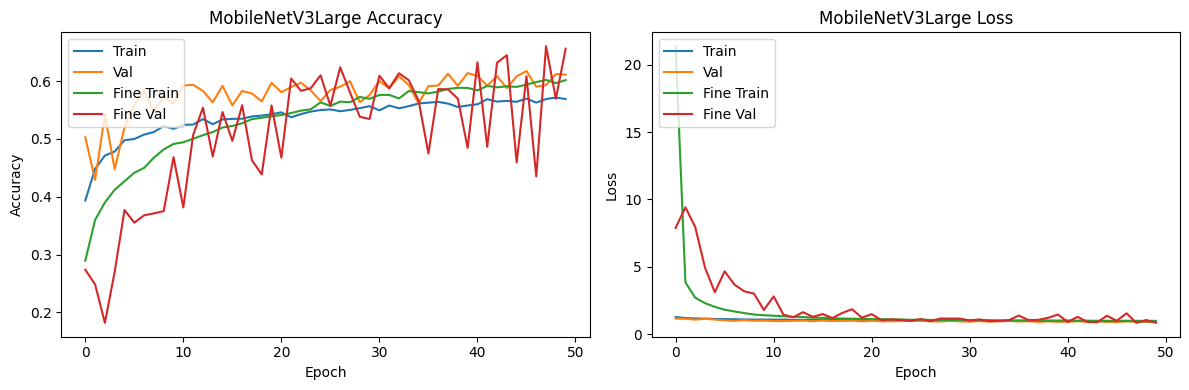

In [ ]:
# Plot training history for MobileNetV3
plot_training_history(history_mobilenet, history_fine_mobilenet, 'MobileNetV3Large')

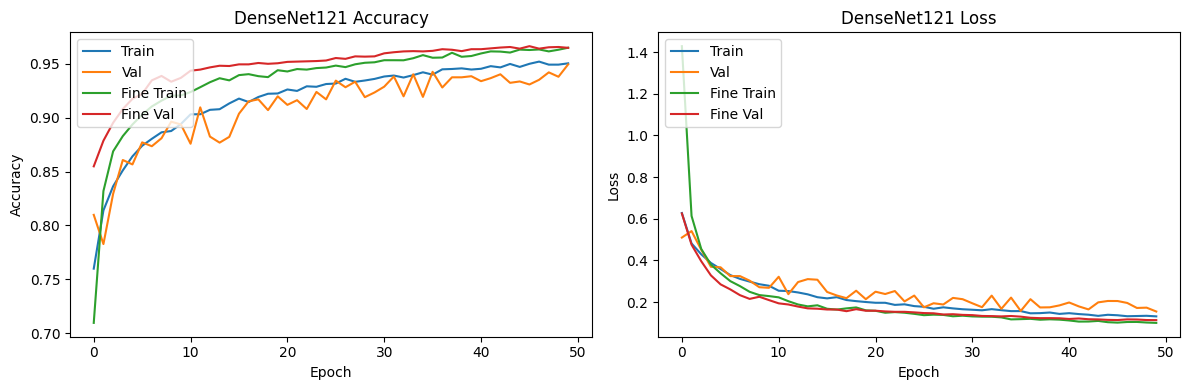

In [ ]:
# Plot training history for DenseNet121
plot_training_history(history_densenet, history_fine_densenet, 'DenseNet121')

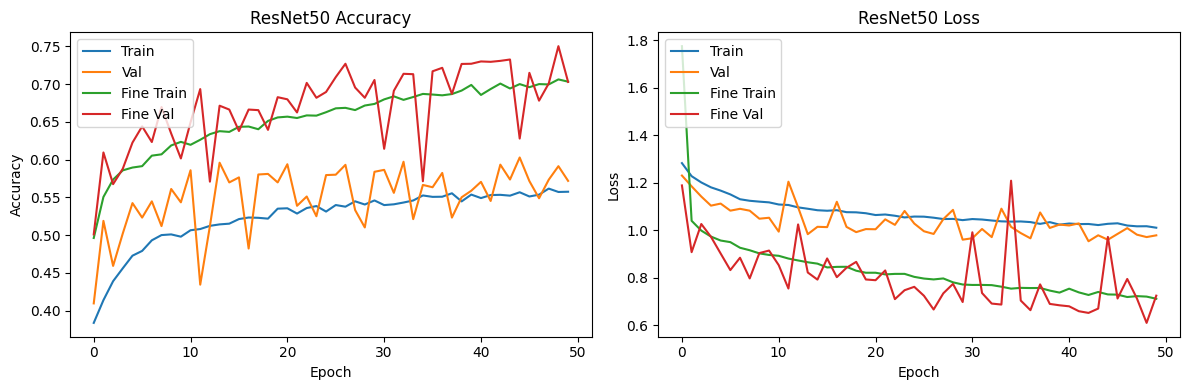

In [ ]:
# Plot training history for ResNet50
plot_training_history(history_resnet, history_fine_resnet, 'ResNet50')

136/136 [==============================] - 13s 79ms/step


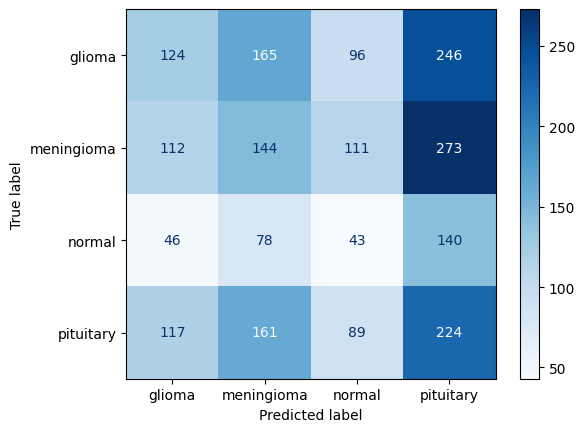

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def plot_confusion_matrix(model, generator, class_names):
    # Get true labels and predictions
    true_labels = generator.classes
    pred_labels = model.predict(generator)
    pred_labels = np.argmax(pred_labels, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Get class names
class_names = list(train_generator.class_indices.keys())

# Plot confusion matrix for MobileNetV3
plot_confusion_matrix(model, test_generator, class_names)

# Analysis

### Accuracy and mAP

DenseNet121 has the highest test accuracy (0.96) and mAP (0.98), indicating it is the best model in terms of classification performance and precision.
ResNet50 has a moderate test accuracy (0.71) and mAP (0.65), performing better than MobileNetV3 but significantly worse than DenseNet121.
MobileNetV3 has the lowest test accuracy (0.67) and mAP (0.53), making it the least effective model in terms of classification performance.

### Training Time

MobileNetV3 has the shortest training time (12424.56 seconds), which results in the most efficient in terms of computational resources.
ResNet50 has a moderate training time (17574.55 seconds), which is longer than MobileNetV3 but shorter than DenseNet121.
DenseNet121 has the longest training time (39842.43 seconds), which is significantly higher than both MobileNetV3 and ResNet50.

### Model Parameter

MobileNetV3 has approximately 5.4 millionis number of parameters and is designed to be lightweight and efficient, making it ideal for deployment on devices with limited computational resources, such as mobile phones and IoT devices. Its low parameter count contributes to faster training and inference times.

DenseNet121 strikes a balance between model complexity and performance with approximately 8 million number of parameters. Its architecture features dense connections that promote efficient gradient flow and feature reuse, leading to high accuracy. The moderate number of parameters allows it to achieve excellent performance without being overly computationally demanding.

ResNet50 has the highest parameter count among the three models which is approximately 23.5 million, making it the most complex and resource-intensive. This high parameter count enables it to handle deep learning tasks effectively, but at the cost of increased computational demand and longer training times.

# Conclusion

DenseNet121 is the best-suited model for this classification task in terms of accuracy and mAP. Its superior classification performance (0.96 accuracy and 0.98 mAP) outweighs its longer training time. It has approximately 8 million parameters, striking a balance between complexity and efficiency. Despite its longer training time (39842.43 seconds), its dense connections enable efficient gradient flow and feature reuse, leading to high accuracy.
For applications where accuracy and precision are critical, DenseNet121 is the apparent choice despite its higher computational cost.

MobileNetV3 is the most efficient in terms of training time (12424.56 seconds) and has the fewest parameters (5.4 million), making it lightweight and suitable for resource-constrained environments like mobile and edge devices. However, it offers lower accuracy (0.67) and mAP (0.53).

ResNet50 offers a balance between performance and training time with a test accuracy of 0.71 and mAP of 0.65, and a training time of 17574.55 seconds. It has the highest number of parameters (23.5 million), making it resource-intensive but capable of handling deep learning tasks effectively. It could be suitable for cases where a trade-off between moderate accuracy and computational efficiency is acceptable.

Overall, DenseNet121 stands out as the best model for the classification task due to its exceptional performance with a manageable level of complexity and computational demand, despite the higher training time.